In [1]:
from keras.layers import Conv2D, UpSampling2D
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import os
import cv2

In [2]:
path = 'dataset/'
SIZE = 256

color_img = []
gray_img = []
gray_files = os.listdir(path + 'gray/') 
color_files = os.listdir(path + 'color/')

for i in tqdm(range(len(gray_files))):
  gray_actual_img = cv2.imread(path + 'gray/' + gray_files[i])
  gray_actual_img = cv2.cvtColor(gray_actual_img, cv2.COLOR_BGR2GRAY)
  gray_actual_img = cv2.resize(gray_actual_img, (SIZE, SIZE))
  gray_actual_img = gray_actual_img.astype('float32') / 255.0
  gray_img.append(gray_actual_img)
  
for i in tqdm(range(len(color_files))):
  img = cv2.imread(path + 'color/' + color_files[i])
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (SIZE, SIZE))
  img = img.astype('float32') / 255.0
  color_img.append(img)

100%|██████████| 7129/7129 [00:14<00:00, 504.18it/s]


In [3]:
X_train = np.array(gray_img)
Y_train = np.array(color_img)

In [4]:
split = int(0.8 * len(X_train))
X_train, X_test = X_train[:split], X_train[split:]
Y_train, Y_test = Y_train[:split], Y_train[split:]

split = int(0.5 * len(X_test))
X_test, X_val = X_test[:split], X_test[split:]
Y_test, Y_val = Y_test[:split], Y_test[split:]

In [5]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_val = np.array(X_val)
Y_val = np.array(Y_val)

In [6]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2, input_shape=(256, 256, 1)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))

#Decoder
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(Conv2D(3, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))
model.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])
model.summary()

c:\Users\sacha\anaconda3\envs\SY32\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 256)    │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 64, 64, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 128, 128, 16)   │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 128, 128, 3)    │           435 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 256, 256, 3)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,219,555 (23.73 MB)

 Trainable params: 6,219,555 (23.73 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=20, batch_size=10)

Epoch 1/20
 16/571 ━━━━━━━━━━━━━━━━━━━━ 29:22 3s/step - accuracy: 0.2625 - loss: 0.2801

In [17]:
print(model.evaluate(X_test, Y_test, batch_size=10))

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 480ms/step - accuracy: 0.4587 - loss: 0.0119
[0.011016747914254665, 0.46546119451522827]


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 869ms/step


(-0.5, 255.5, 255.5, -0.5)

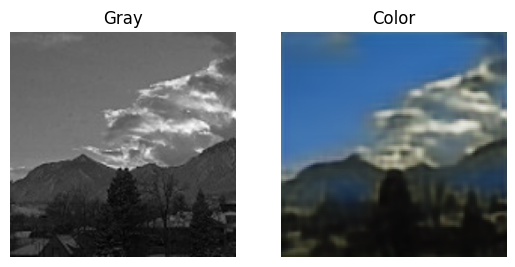

In [21]:
plt.subplot(1, 2, 1)
image = np.random.randint(0, len(X_test))
plt.imshow(X_test[image].reshape(256, 256), cmap='gray')
plt.title('Gray')
plt.axis('off')

output = model.predict(X_test)
output *= 255
output = output.clip(0, 255)
output = output.astype('uint8')

plt.subplot(1, 2, 2)
plt.imshow(output[image])
plt.title('Color')
plt.axis('off')

In [22]:
model.save('colorize_autoencoder_v1_(256x256-5700-20-10).h5')

In [5]:
# Load the model
from keras.models import load_model

def custom_mse(y_true, y_pred):
    return tf.keras.losses.mean_squared_error(y_true, y_pred)

model = load_model('colorize_autoencoder_v1_(256x256-570-20-10).h5', custom_objects={'mse': custom_mse})
